**IMPORT NECESSARY LIBRARIES**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

IMPORT DATASET

In [28]:
df1 =  pd.read_csv("/home/jerome/Documents/bank+marketing/bank/bank.csv", sep = ';')
df2 =   pd.read_csv("/home/jerome/Documents/bank+marketing/bank/bank-full.csv", sep = ';')


In [29]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [30]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**REMOVE DUPLICATES**

In [31]:
df1.duplicated().sum()

np.int64(0)

In [32]:
df2.duplicated().sum()

np.int64(0)

**CONCATINATE DATASET**

In [33]:
df3 = pd.concat([df1, df2], ignore_index=True)

In [34]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [35]:
df3['duration']

0          79
1         220
2         185
3         199
4         226
         ... 
49727     977
49728     456
49729    1127
49730     508
49731     361
Name: duration, Length: 49732, dtype: int64

In [36]:
df3.duplicated().sum()

np.int64(4521)

In [37]:
df3 = df3.drop_duplicates()

**CHECK NULL VALUES**

In [38]:
df3.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


**CHECK DATA DISTRIBUTION FOR NUMERICAL VALUES**

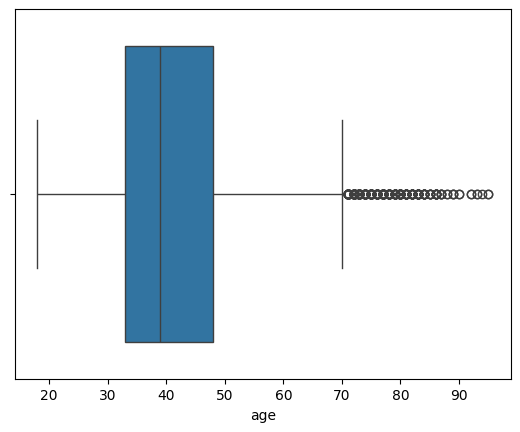

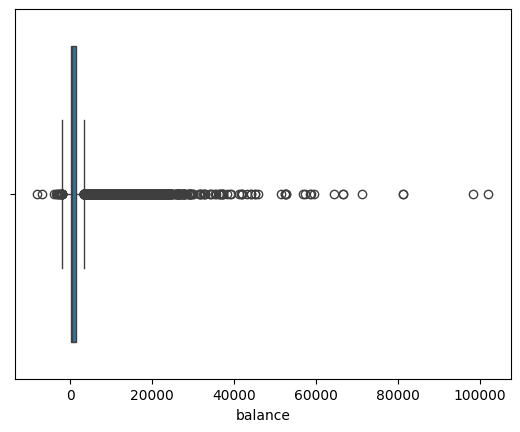

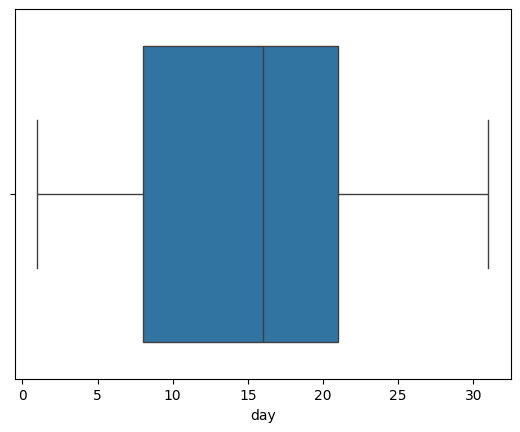

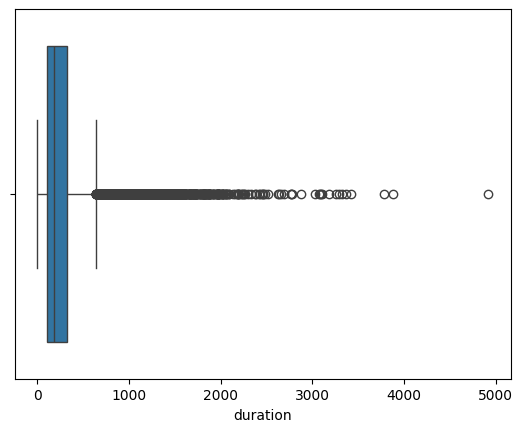

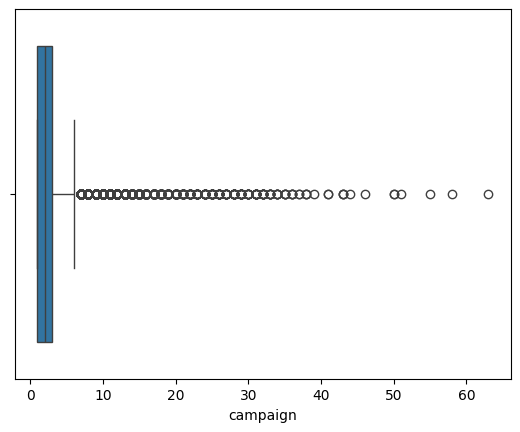

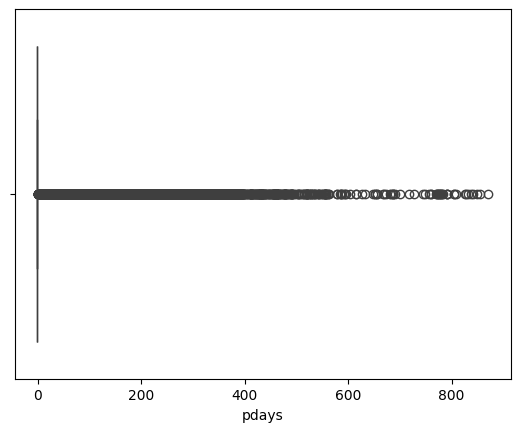

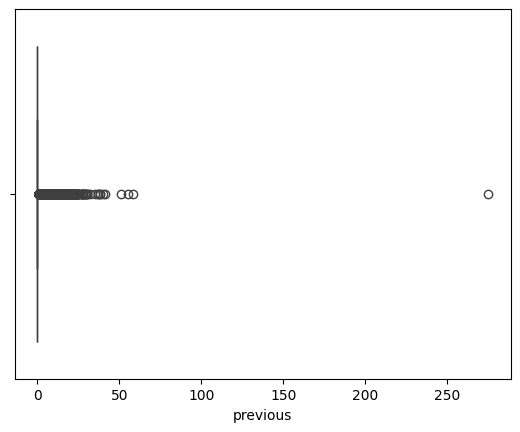

In [40]:
num = df3.select_dtypes("number")
cat = df3.select_dtypes("object")
for x in num.columns:
    sns.boxplot(x = num[x])
    plt.show()

**CHECK DATA DISTRIBUTION FOR CATEGORICAL VALUES**

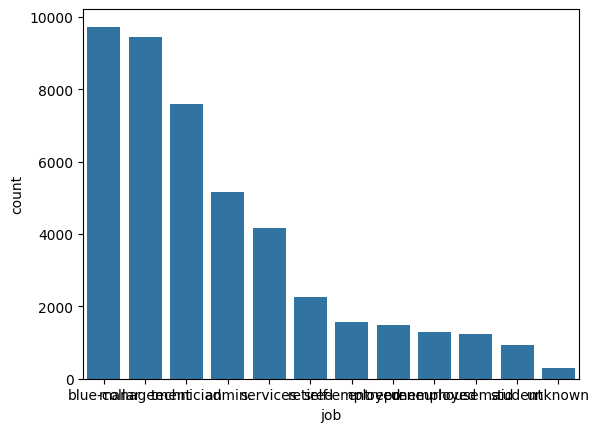

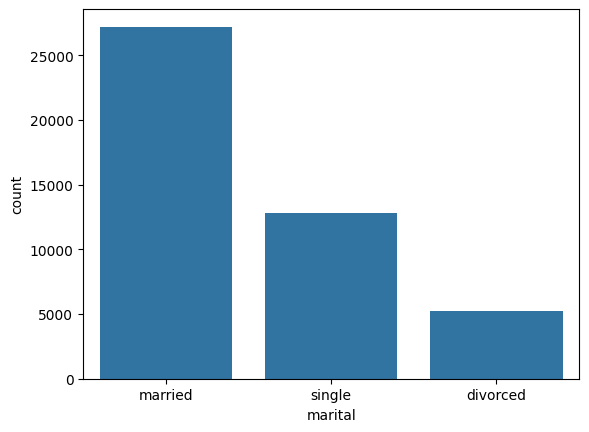

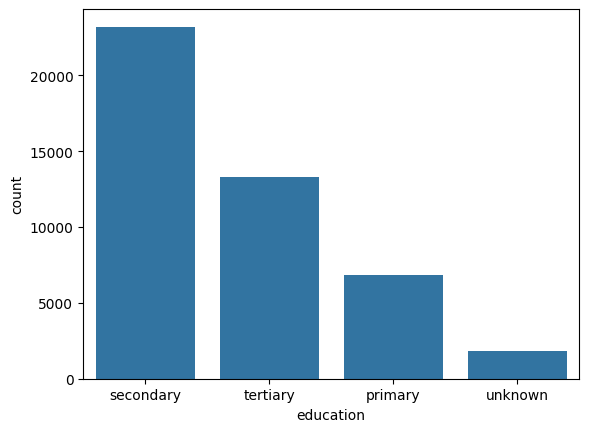

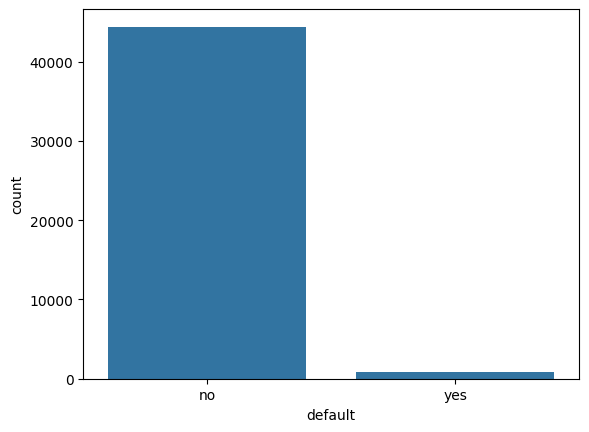

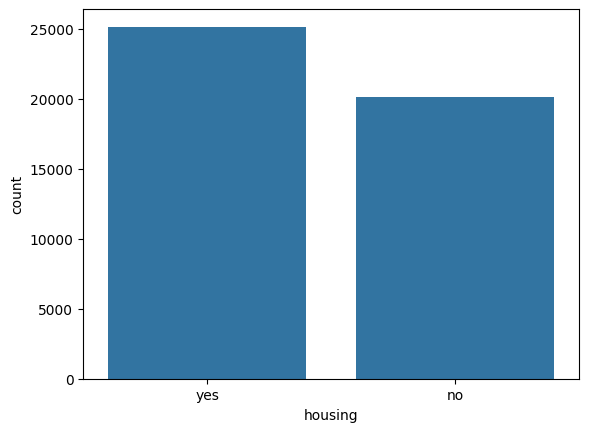

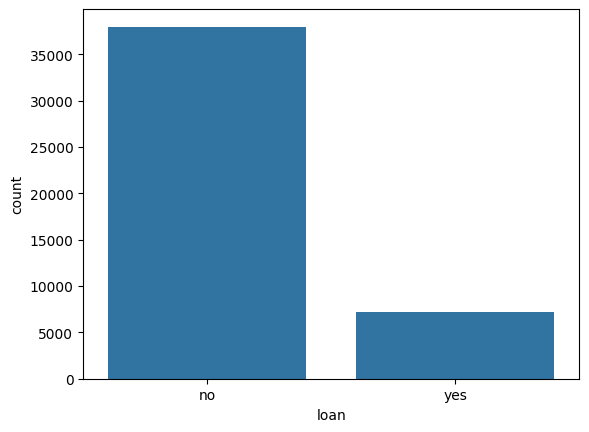

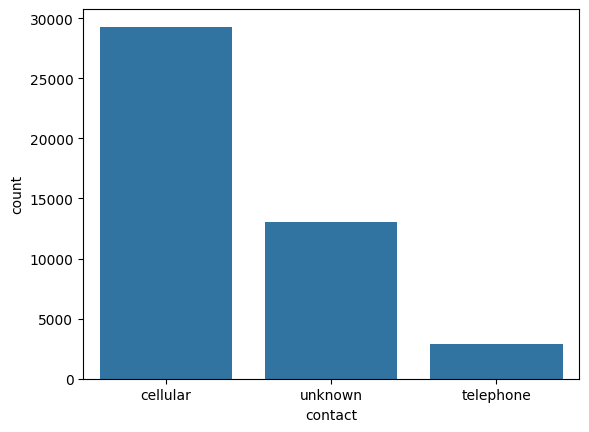

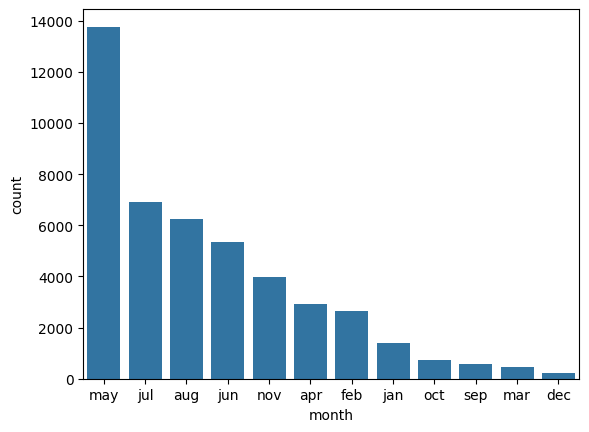

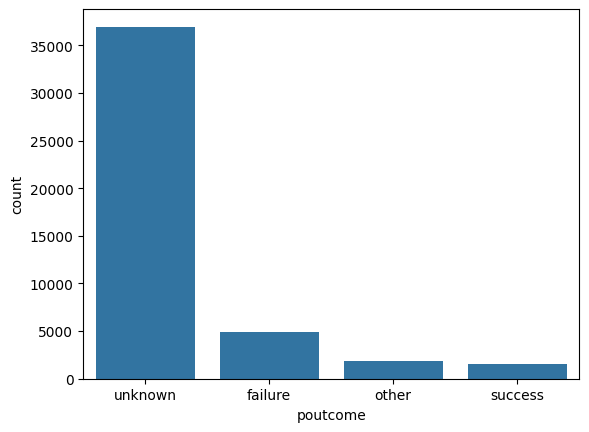

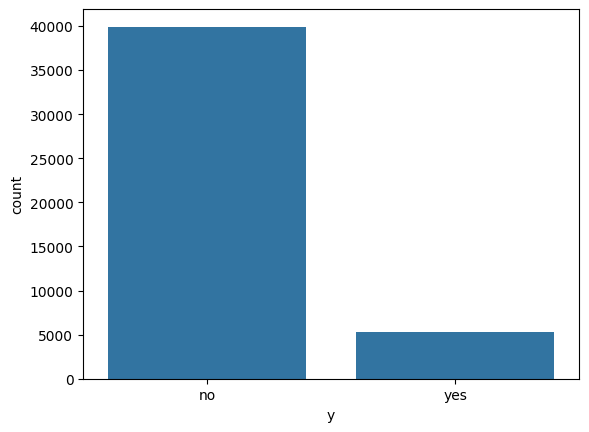

In [41]:
for y in cat.columns:
    sns.barplot(cat[y].value_counts())
    plt.show()

In [42]:
df3 = df3.drop(columns=['duration'])

**ENCODE CATEGORICAL VALUES**

In [43]:
le = LabelEncoder()
for col in cat.columns:
    df3[col] = le.fit_transform(df3[col])

In [44]:
X = df3.drop(columns='y',axis = 1)
y = df3['y']

**DATA SPLITTING**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


**MODEL TRAINING**

In [47]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

/home/jerome/Documents/python_workspace/myenv/share/jupyter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**MODEL EVALUATION**

In [48]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      7985
           1       0.19      0.64      0.29      1058

    accuracy                           0.64      9043
   macro avg       0.56      0.64      0.53      9043
weighted avg       0.84      0.64      0.70      9043



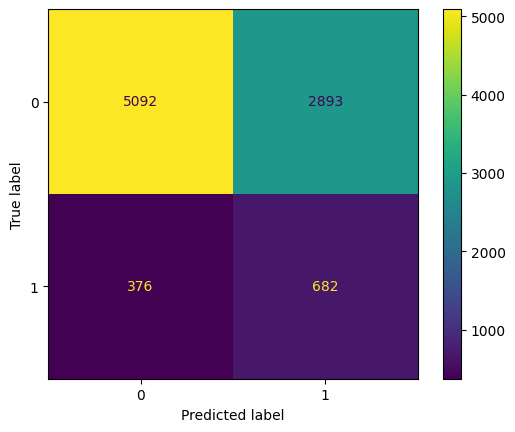

In [49]:
CM = metrics.confusion_matrix(y_test,y_pred,labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = CM,display_labels = model.classes_)
disp.plot()